In [478]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from dateutil import parser

In [479]:
df1 = pd.read_excel('O2D_delay_data.xlsx', 'logistics')
df2 = pd.read_excel('O2D_delay_data.xlsx', 'po_level')
df2 = df2[df2['order_status'].str.lower() == 'completed']
# df2 = df2[['buyer_name', 'seller_name', 'seller_po_number', 'seller_po_status', 'transporter_type' , 'seller_po_creation_date', 'buyer_invoice_item_quantity', 'po_quantity', 'order_completion_percentage', 'o2d_']]
df1.head()

,sno,date,po_number,po_qty,seller_po_creation_date,category,dispatched_qty,origin,destination,dispatch_week,po_ts,nextbuy_order_indent_ts,nextbuy_vehicle_indent_ts,transporter_order_indent_ts,transporter_order_indent_acceptance_ts,vehicle_placement_ts,expected_date_of_vehicle_reporting,vehicle_reported_ts,vehicle_loaded_ts,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,nextbuy_order_indent_tat,nextbuy_vehicle_indent_tat,vehicle_placement_tat,vehicle_reported_tat,vehicle_dispatch_tat,vehicle_reported_actual_vs_expected,transporter_order_tat,dispatch_to_delivery_tat,unloading_tat,vehicle_level_o2d
0,1,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.709999,Raipur,Gandhinagar,April 2 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/12/2024 20:07:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/13/2024 11:52:00,4/13/2024 23:59:59,4/13/2024 12:51:00,4/13/2024 15:57:00,4/13/2024 18:02:00,4/16/2024 9:55:00,4/16/2024 10:15:00,4/16/2024 13:30:00,0.032280,0.000012,0.656262,0.040984,0.215984,-0.464583,0.003484,2.661817,0.149317,0.945463
1,2,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,39.230000,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 14:10:00,4/15/2024 15:32:00,4/18/2024 9:00:00,4/18/2024 10:12:00,4/19/2024 10:45:00,2.073854,0.000012,0.904178,0.544456,1.337512,-0.690278,0.010428,2.727789,1.072928,4.859950
2,3,2024-04-10,PO/25/MH/73,300.0,2024-04-10,RMC - Steel,34.189999,Raipur,Jalna,April 3 Week,04/10/2024 18:53:40,4/12/2024 20:40:00,4/12/2024 20:40:00,4/12/2024 20:55:00,4/12/2024 21:40:00,4/13/2024 18:22:00,4/14/2024 23:59:59,4/14/2024 7:26:00,4/15/2024 16:37:00,4/15/2024 17:20:00,4/18/2024 12:00:00,4/18/2024 12:00:00,4/19/2024 11:30:00,2.073854,0.000012,0.904178,0.544456,1.412512,-0.690278,0.010428,2.777789,0.979178,4.934950
3,4,2024-04-12,PO/25/MH/96,60.0,2024-04-12,RMC - Aluminium,29.260000,Raipur,Gandhinagar,April 3 Week,04-12-2024 19:20:32,4/12/2024 20:07:00,4/14/2024 21:50:00,4/12/2024 20:12:00,4/12/2024 20:45:00,4/15/2024 11:55:00,4/15/2024 23:59:59,4/15/2024 13:30:00,4/15/2024 17:55:00,4/15/2024 19:30:00,4/17/2024 20:00:00,4/18/2024 15:20:00,4/18/2024 16:30:00,0.032280,2.071539,0.586817,0.065984,0.250012,-0.437500,0.003484,2.020845,0.854178,3.006570
4,5,2024-04-16,PO/25/HA/111,600.0,2024-04-16,RMC - Steel,25.129999,Durgapur,Sikendarabad,April 3 Week,04/16/2024 17:54:35,4/17/2024 16:23:00,4/17/2024 16:23:00,4/18/2024 10:20:00,4/18/2024 10:50:00,4/22/2024 11:00:00,4/19/2024 23:59:59,04/24/24 4:05:00,04/24/24 14:02:00,04/24/2024 22:15:00,4/26/2024 23:00:00,04/27/2024 16:15:00,04/28/2024 15:00:00,0.936412,0.000012,4.775706,1.711817,0.756956,4.170139,0.747928,2.031262,1.666678,8.180850


In [480]:
df2_selected_cols = df2[['buyer_name', 'seller_name', 'seller_po_number',
       'transporter_type', 'order_type',
       'order_completion_percentage', 'o2d_', 'O2D_Bucket']]
df = df1.merge(df2_selected_cols, left_on='po_number', right_on = 'seller_po_number', how = 'left')

# df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'], format='%m/%d/%y %H:%M:%S')
df = df.sort_values(by=['po_number', 'vehicle_unloaded_ts'])

# ## removing all the po which has NA in dispatched_qty
# dispatch_qty_na_po = set(df[df['dispatched_qty'].isna()]['po_number'].unique())
# print('Shape of df before filtering the po with NAN dispatch_qty')
# print(df.shape)
# df = df[~df['po_number'].isin(dispatch_qty_na_po)]
# print('Shape of df after filtering the po with NAN dispatch_qty')
print(df.shape)

## Renaming the category
df.loc[(df['category'] == 'RMX - Steel'), 'category'] = 'RMC - Steel'
df.loc[(df['transporter_type'] == 'Bizongo Non O2D'), 'transporter_type'] = 'Bizongo'

## Ranking the order of the transport
df['order'] = df.groupby('po_number')[['vehicle_reached_delivery_location_ts']].rank(method='first')
df = df[~df['po_number'].isin(['PO/25/MH/498','PO/25/MH/564', 'PO/25/MH/568'])
df = df[~df['po_qty'].isna()]

## Route
df['route'] = df['origin'].str.lower() + '-' + df['destination'].str.lower()
df['lane_order'] = df.groupby('route')[['po_ts']].rank(method='min')


### Month wise
df['po_ts'] = df['po_ts'].astype(str)
def safe_parse(date_str):
    try:
        return parser.parse(date_str)
    except (ValueError, TypeError):
        return pd.NaT

df['po_ts'] = df['po_ts'].apply(safe_parse)
df['Month'] = df['po_ts'].dt.strftime('%B')


### Total rounds 

po_count = df['po_number'].value_counts().reset_index()
po_count.rename(columns = {'count' : 'total_rounds'}, inplace = True)
df = df.merge(po_count, on = 'po_number')

print(df.shape)

SyntaxError: '[' was never closed (1474615790.py, line 23)

In [481]:
import pandas as pd
import numpy as np
from datetime import datetime

def convert_date_format(date_str):
    if pd.isna(date_str):
        return np.nan
    
    if isinstance(date_str, pd.Timestamp):
        return date_str.strftime("%m/%d/%Y %H:%M:%S")
    
    if isinstance(date_str, str):
        # Remove AM/PM if present
        date_str = date_str.replace(" AM", "").replace(" PM", "")
        
        # Add seconds if not present in the input string
        if len(date_str.split(':')) == 2:
            date_str += ":00"
        
        # Try different possible input formats for string inputs
        for fmt in ("%m/%d/%y %H:%M:%S", "%m/%d/%Y %H:%M:%S"):
            try:
                dt = datetime.strptime(date_str, fmt)
                return dt.strftime("%m/%d/%Y %H:%M:%S")
            except ValueError:
                pass
        
        # Handle formats with a single-digit month or day
        try:
            dt = datetime.strptime(date_str, "%m/%d/%Y %H:%M:%S")
            return dt.strftime("%m/%d/%Y %H:%M:%S")
        except ValueError:
            pass
        
    raise ValueError(f"Date format not recognized for '{date_str}'")

# Assuming df is already defined
df['vehicle_reached_delivery_location_ts'] = df['vehicle_reached_delivery_location_ts'].apply(lambda x: convert_date_format(x))
df['payment_confirmation_received_by_ops'] = df['payment_confirmation_received_by_ops'].apply(lambda x: convert_date_format(x))
df['vehicle_unloaded_ts'] = df['vehicle_unloaded_ts'].apply(lambda x: convert_date_format(x))

# Convert the date columns back to datetime
df['vehicle_reached_delivery_location_ts'] = pd.to_datetime(df['vehicle_reached_delivery_location_ts'])
df['payment_confirmation_received_by_ops'] = pd.to_datetime(df['payment_confirmation_received_by_ops'])
df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])

df = df[['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin', 'destination', 'O2D_', 'vehicle_dispatched_ts', 'vehicle_reached_delivery_location_ts', 'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts', 'buyer_name', 'seller_name','order','route', 'Month', 'total_rounds', 'vehicle_placement_ts']]

df['delay_in_unloading'] = (df['vehicle_unloaded_ts'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['reached_to_payment_tat'] = (df['payment_confirmation_received_by_ops'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
df['payment_to_unloading_tat'] = (df['vehicle_unloaded_ts'] - df['payment_confirmation_received_by_ops']).dt.total_seconds() / (3600 * 24)

route = df[['route']]
df = pd.get_dummies(df, columns=['route'], prefix='route')
df = df.replace({True: 1, False: 0})
df = pd.concat([df, route], axis=1)

# df[df['delay_in_unloading'] >= 1].head()


/tmp/ipykernel_87833/686340998.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay_in_unloading'] = (df['vehicle_unloaded_ts'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
/tmp/ipykernel_87833/686340998.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reached_to_payment_tat'] = (df['payment_confirmation_received_by_ops'] - df['vehicle_reached_delivery_location_ts']).dt.total_seconds() / (3600 * 24)
/tmp/ipykernel_87833/686340998.py:51: SettingWithCopyWarn

In [482]:
df.pivot_table(index ='buyer_name', columns = 'Month', aggfunc = {'delay_in_unloading':['min', 'max', 'mean'], 'po_qty':['min', 'max', 'mean'], 'dispatched_qty': ['min', 'max', 'mean']}).fillna(0).round(2)


delay_in_unloading              \
                                                           max               
Month                                                    April  June   May   
buyer_name                                                                   
ADITYA METAL INDUSTRIES                                   0.85  0.00  0.34   
ANVIL CABLES PRIVATE LIMITED                              0.00  0.46  1.82   
AVS INFRA PROJECT                                         0.00  1.51  1.22   
Amar Partap Steels Pvt. Ltd.                              0.00  1.34  0.90   
DEVA METAL POWDERS PRIVATE LIMITED                        0.40  0.00  0.00   
HANNU STEEL PRIVATE LIMITED                               4.29  0.00  0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED                   0.00  0.00  0.00   
M/S SHREE GANPATI TRADERS                                 3.44  0.00  0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED               0.00  0.11  0.00   
METAROLLS ISPAT PRIVATE LIMITED                           7.34  1.12  0.00   
R.C.ALUMINIUM                                             0.00  0.08  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED                          0.00  0.21  0.00   
SHRI RATHI STEEL LIMITED                                  0.00  2.92  0.00   
SKY TEXPROS PRIVATE LIMITED                               0.00  0.00  0.50   
SRI BALAJI METAL INDUSTRIES                               0.00  0.04  0.00   
Sagar Asia Private Limited                                0.00  0.12  0.04   
VIRGO ALUMINUM LIMITED                                    1.92  1.42  1.95   
VIRLA GOLD ISPAT LLP                                      0.00  2.08  1.61   

                                                                           \
                                             mean               min         
Month                                       April  June   May April  June   
buyer_name                                                                  
ADITYA METAL INDUSTRIES                      0.50  0.00  0.34  0.15  0.00   
ANVIL CABLES PRIVATE LIMITED                 0.00  0.46  1.05  0.00  0.46   
AVS INFRA PROJECT                            0.00  0.83  1.00  0.00  0.43   
Amar Partap Steels Pvt. Ltd.                 0.00  1.34  0.83  0.00  1.34   
DEVA METAL POWDERS PRIVATE LIMITED           0.40  0.00  0.00  0.40  0.00   
HANNU STEEL PRIVATE LIMITED                  1.32  0.00  0.00  0.17  0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED      0.00  0.00  0.00  0.00  0.00   
M/S SHREE GANPATI TRADERS                    1.99  0.00  0.00  0.37  0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED  0.00  0.11  0.00  0.00  0.11   
METAROLLS ISPAT PRIVATE LIMITED              1.32  0.52  0.00  0.06  0.28   
R.C.ALUMINIUM                                0.00  0.08  0.00  0.00  0.08   
RATNA EXTRUSIONS PRIVATE LIMITED             0.00  0.21  0.00  0.00  0.21   
SHRI RATHI STEEL LIMITED                     0.00  0.90  0.00  0.00  0.23   
SKY TEXPROS PRIVATE LIMITED                  0.00  0.00  0.50  0.00  0.00   
SRI BALAJI METAL INDUSTRIES                  0.00  0.02  0.00  0.00  0.00   
Sagar Asia Private Limited                   0.00  0.12  0.04  0.00  0.12   
VIRGO ALUMINUM LIMITED                       1.92  1.42  0.99  1.92  1.42   
VIRLA GOLD ISPAT LLP                         0.00  1.15  1.61  0.00  0.33   

                                                  dispatched_qty         \
                                                             max          
Month                                         May          April   June   
buyer_name                                                                
ADITYA METAL INDUSTRIES                      0.34          29.71   0.00   
ANVIL CABLES PRIVATE LIMITED                 0.27           0.00  24.90   
AVS INFRA PROJECT                            0.17           0.00  42.06   
Amar Partap Steels Pvt. Ltd.                 0.77           0.00  41.71   
DEVA METAL POWDERS PRIVATE LIMIT

In [483]:
df.pivot_table(index ='buyer_name', columns = 'Month', aggfunc = {'delay_in_unloading':['min', 'max', 'mean'], 'O2D_' : 'mean'}).fillna(0).round(2)


O2D_               \
                                              mean                
Month                                        April   June   May   
buyer_name                                                        
ADITYA METAL INDUSTRIES                       1.99   0.00  1.00   
ANVIL CABLES PRIVATE LIMITED                  0.00   2.00  6.06   
AVS INFRA PROJECT                             0.00   4.33  3.32   
Amar Partap Steels Pvt. Ltd.                  0.00   7.49  2.50   
DEVA METAL POWDERS PRIVATE LIMITED            2.00   0.00  0.00   
HANNU STEEL PRIVATE LIMITED                  15.29   3.33  0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED       0.00   1.00  0.00   
M/S SHREE GANPATI TRADERS                    13.83   0.00  0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED   0.00  24.00  0.00   
METAROLLS ISPAT PRIVATE LIMITED              14.36   4.30  0.00   
R.C.ALUMINIUM                                 0.00   0.00  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED              0.00   0.50  0.00   
SHRI RATHI STEEL LIMITED                      0.00   5.70  0.00   
SKY TEXPROS PRIVATE LIMITED                   0.00   0.00  0.00   
SRI BALAJI METAL INDUSTRIES                   0.00   2.00  0.00   
Sagar Asia Private Limited                    0.00   1.00  2.00   
VIRGO ALUMINUM LIMITED                        6.00   0.00  4.15   
VIRLA GOLD ISPAT LLP                          0.00   4.67  3.00   

                                            delay_in_unloading              \
                                                           max               
Month                                                    April  June   May   
buyer_name                                                                   
ADITYA METAL INDUSTRIES                                   0.85  0.00  0.34   
ANVIL CABLES PRIVATE LIMITED                              0.00  0.46  1.82   
AVS INFRA PROJECT                                         0.00  1.51  1.22   
Amar Partap Steels Pvt. Ltd.                              0.00  1.34  0.90   
DEVA METAL POWDERS PRIVATE LIMITED                        0.40  0.00  0.00   
HANNU STEEL PRIVATE LIMITED                               4.29  0.00  0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED                   0.00  0.00  0.00   
M/S SHREE GANPATI TRADERS                                 3.44  0.00  0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED               0.00  0.11  0.00   
METAROLLS ISPAT PRIVATE LIMITED                           7.34  1.12  0.00   
R.C.ALUMINIUM                                             0.00  0.08  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED                          0.00  0.21  0.00   
SHRI RATHI STEEL LIMITED                                  0.00  2.92  0.00   
SKY TEXPROS PRIVATE LIMITED                               0.00  0.00  0.50   
SRI BALAJI METAL INDUSTRIES                               0.00  0.04  0.00   
Sagar Asia Private Limited                                0.00  0.12  0.04   
VIRGO ALUMINUM LIMITED                                    1.92  1.42  1.95   
VIRLA GOLD ISPAT LLP                                      0.00  2.08  1.61   

                                                                           \
                                             mean               min         
Month                                       April  June   May April  June   
buyer_name                                                                  
ADITYA METAL INDUSTRIES                      0.50  0.00  0.34  0.15  0.00   
ANVIL CABLES PRIVATE LIMITED                 0.00  0.46  1.05  0.00  0.46   
AVS INFRA PROJECT                            0.00  0.83  1.00  0.00  0.43   
Amar Partap Steels Pvt. Ltd.                 0.00  1.34  0.83  0.00  1.34   
DEVA METAL POWDERS PRIVATE LIMITED           0.40  0.00  0.00  0.40  0.00   
HANNU STEEL PRIVATE LIMITED                  1.32  0.00  0.00  0.17  0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED      0.00  0.00  0.00  0.00  0.00   
M/S SHR

In [484]:
df['vehicle_dispatched_ts'] = pd.to_datetime(df['vehicle_dispatched_ts'])
df['vehicle_unloaded_ts'] = pd.to_datetime(df['vehicle_unloaded_ts'])

df = df.sort_values(by=['po_number', 'order'])
unique_po = df['po_number'].unique()

df['#vehicle_before_unloading'] = 0
df['qty_before_unloading'] = 0

df_temp = pd.DataFrame()

for po_number in unique_po:
    temp = df[df['po_number'] == po_number].copy()
    for i in range(len(temp)):
        count = 0
        # qty = temp.iloc[i]['dispatched_qty']
        qty = 0
        for j in range(i + 1, len(temp)):
            if temp.iloc[i]['vehicle_unloaded_ts'] >= temp.iloc[j]['vehicle_dispatched_ts']:
                count += 1
                qty += temp.iloc[j]['dispatched_qty']
        temp.at[temp.index[i], '#vehicle_before_unloading'] = count
        temp.at[temp.index[i], 'qty_before_unloading'] = qty
    df_temp = pd.concat([df_temp, temp])


df_temp['qty_reached_till_now'] = df_temp.groupby('po_number')['dispatched_qty'].cumsum()

df_temp.reset_index(drop=True, inplace=True)

/tmp/ipykernel_87833/2407153036.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '25.1299991607666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'qty_before_unloading'] = qty
/tmp/ipykernel_87833/2407153036.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '265.67000007629395' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'qty_before_unloading'] = qty
/tmp/ipykernel_87833/2407153036.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '61.90999984741211' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  temp.at[temp.index[i], 'qty_before_unloading'] = qty
/tmp/ipykernel_87833/2407153036.py:23: FutureW

In [485]:
df3 = pd.DataFrame()
for po_n in df_temp['po_number'].unique():
    temp = df_temp[df_temp['po_number'] == po_n]
    temp['vehicle_wise_o2d'] = 0
    for i in range(1, len(temp)-1):
        temp.at[temp.index[i], 'vehicle_wise_o2d'] = temp.iloc[i]['O2D_'] - temp.iloc[i-1]['O2D_']
    df3 = pd.concat([df3, temp])


/tmp/ipykernel_87833/3999201411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['vehicle_wise_o2d'] = 0
/tmp/ipykernel_87833/3999201411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['vehicle_wise_o2d'] = 0
/tmp/ipykernel_87833/3999201411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [486]:
df3.head()

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,delay_in_unloading,reached_to_payment_tat,payment_to_unloading_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_champa-ahmndabad,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-hyderabad,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now,vehicle_wise_o2d
0,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,30.000000,Durgapur,Sikendarabad,14.759483,2024-04-24 22:00:00,2024-04-26 11:00:00,2024-04-27 14:14:00,2024-04-27 16:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,1.0,April,17,2024-04-24 07:31:00,1.208333,1.134722,0.073611,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,1,25.129999,30.000000,0
1,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,25.129999,Durgapur,Sikendarabad,14.759483,2024-04-24 22:15:00,2024-04-26 23:00:00,2024-04-27 16:15:00,2024-04-28 15:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,2.0,April,17,2024-04-22 11:00:00,1.666667,0.718750,0.947917,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,1,33.790001,55.129999,0
2,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,42.040001,Durgapur,Sikendarabad,14.759483,2024-04-29 21:00:00,2024-05-02 09:00:00,2024-05-02 11:00:00,2024-05-02 13:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,3.0,April,17,2024-04-29 09:03:00,0.166667,0.083333,0.083333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,5,188.730003,97.170000,0
3,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,41.520000,Durgapur,Sikendarabad,14.759483,2024-04-29 22:00:00,2024-05-02 09:28:00,2024-05-02 13:01:00,2024-05-02 13:30:24,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,4.0,April,17,2024-04-28 22:12:00,0.168333,0.147917,0.020417,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,4,147.210003,138.690001,0
4,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,33.790001,Durgapur,Sikendarabad,14.759483,2024-04-27 22:00:00,2024-05-02 09:28:00,2024-05-02 01:46:00,2024-05-02 18:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,5.0,April,17,2024-04-26 15:00:00,0.355556,-0.320833,0.676389,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,4,144.580002,172.480001,0


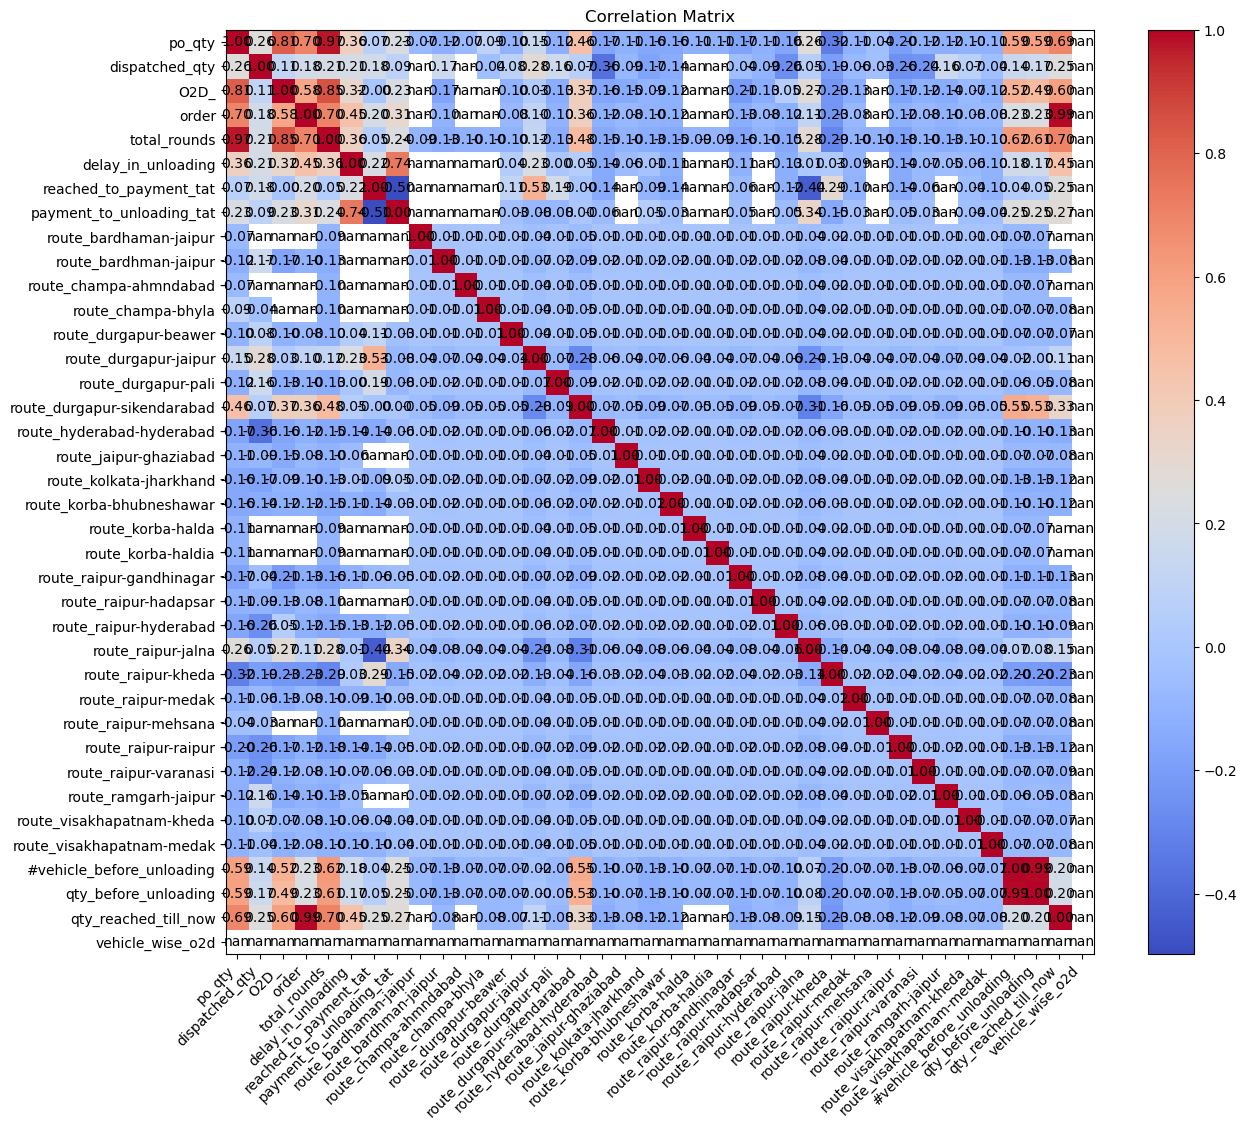

In [487]:


numeric_cols = df3.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
correlation_matrix = df3[numeric_cols].corr()

# Plotting the heatmap with correlation values
plt.figure(figsize=(14,12))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')

# Adding color bar
plt.colorbar(heatmap)

# Adding labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Adding correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.index)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [488]:
df3.pivot_table(index = ['buyer_name', 'category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'vehicle_wise_o2d' : 'mean','po_qty':'mean', 'delay_in_unloading' : [ 'mean'], 'qty_before_unloading':[ 'mean']}).fillna(0).round(2)


O2D_         \
                                                              mean          
Month                                                        April   June   
buyer_name                                  category                        
ADITYA METAL INDUSTRIES                     RMC - Aluminium   1.99   0.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium   0.00   2.00   
AVS INFRA PROJECT                           RMC - Steel       0.00   4.33   
Amar Partap Steels Pvt. Ltd.                RMC - Steel       0.00   7.49   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium   2.00   0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      15.29   3.33   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium   0.00   1.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      13.83   0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium   0.00  24.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      14.36   4.30   
R.C.ALUMINIUM                               RMC - Aluminium   0.00   0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium   0.00   0.50   
SHRI RATHI STEEL LIMITED                    RMC - Steel       0.00   5.70   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium   0.00   0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium   0.00   2.00   
Sagar Asia Private Limited                  RMC - Aluminium   0.00   1.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium   6.00   0.00   
VIRLA GOLD ISPAT LLP                        RMC - Steel       0.00   4.67   

                                                                   \
                                                                    
Month                                                         May   
buyer_name                                  category                
ADITYA METAL INDUSTRIES                     RMC - Aluminium  1.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium  6.06   
AVS INFRA PROJECT                           RMC - Steel      3.32   
Amar Partap Steels Pvt. Ltd.                RMC - Steel      2.50   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium  0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium  0.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium  0.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      0.00   
R.C.ALUMINIUM                               RMC - Aluminium  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium  0.00   
SHRI RATHI STEEL LIMITED                    RMC - Steel      0.00   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium  0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium  0.00   
Sagar Asia Private Limited                  RMC - Aluminium  2.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium  4.15   
VIRLA GOLD ISPAT LLP                        RMC - Steel      3.00   

                                                            delay_in_unloading  \
                                                                          mean   
Month                                                                    April   
buyer_name                                  category                             
ADITYA METAL INDUSTRIES                     RMC - Aluminium               0.50   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium               0.00   
AVS INFRA PROJECT                           RMC - Steel                   0.00   
Amar Partap Steels Pvt. Ltd.                RMC - Steel                   0.00   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium               0.40   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel                   1.32   
KPS ALUMINIUM AND GLASS PRIV

In [445]:
"""
When will the unloading delay not be impacted:
1. When qty is less of equal to 2 trips. (Hypothesis), So lets consider a threshold value to be 40 (since mean is less for AL).
2. When trips are just 1.
3. When atleast few dispatches occur after the unloading of fist vehicle.
"""

'\nWhen will the unloading delay not be impacted:\n1. When qty is less of equal to 2 trips. (Hypothesis), So lets consider a threshold value to be 40 (since mean is less for AL).\n2. When trips are just 1.\n3. When atleast few dispatches occur after the unloading of fist vehicle.\n'

In [446]:
print(df3.shape)
df4 = df3[(df3['total_rounds']>1) & (df3['po_qty']>40)]
print(df4.shape)

df5 = pd.DataFrame()
for po_n in df4['po_number'].unique():
    temp = df4[df4['po_number'] == po_n]
    if max(temp['#vehicle_before_unloading'])+1 == len(temp):
        temp['any_vehicle_dispatched_after_first_unloading'] = True
    else:
        temp['any_vehicle_dispatched_after_first_unloading'] = False
    df5 = pd.concat([df5, temp])

df5 = df5[df5['any_vehicle_dispatched_after_first_unloading'] == False]
df5.shape

(134, 52)
(107, 52)


/tmp/ipykernel_87833/1491417121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['any_vehicle_dispatched_after_first_unloading'] = False
/tmp/ipykernel_87833/1491417121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['any_vehicle_dispatched_after_first_unloading'] = True
/tmp/ipykernel_87833/1491417121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

(78, 53)

In [447]:
df5.pivot_table(index = ['buyer_name', 'category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'vehicle_wise_o2d' : 'mean','po_qty':'mean', 'delay_in_unloading' : ['max', 'mean'], 'qty_before_unloading':['max', 'mean']}).fillna(0).round(2)


O2D_              \
                                                  mean               
Month                                            April  June   May   
buyer_name                      category                             
ANVIL CABLES PRIVATE LIMITED    RMC - Aluminium   0.00  0.00  6.06   
HANNU STEEL PRIVATE LIMITED     RMC - Steel      14.76  3.33  0.00   
M/S SHREE GANPATI TRADERS       RMC - Steel      13.83  0.00  0.00   
METAROLLS ISPAT PRIVATE LIMITED RMC - Steel      14.36  4.30  0.00   
SHRI RATHI STEEL LIMITED        RMC - Steel       0.00  5.70  0.00   
VIRGO ALUMINUM LIMITED          RMC - Aluminium   0.00  0.00  3.87   

                                                delay_in_unloading        \
                                                               max         
Month                                                        April  June   
buyer_name                      category                                   
ANVIL CABLES PRIVATE LIMITED    RMC - Aluminium               0.00  0.00   
HANNU STEEL PRIVATE LIMITED     RMC - Steel                   4.29  0.00   
M/S SHREE GANPATI TRADERS       RMC - Steel                   3.44  0.00   
METAROLLS ISPAT PRIVATE LIMITED RMC - Steel                   7.34  1.12   
SHRI RATHI STEEL LIMITED        RMC - Steel                   0.00  2.92   
VIRGO ALUMINUM LIMITED          RMC - Aluminium               0.00  0.00   

                                                                         \
                                                       mean               
Month                                             May April  June   May   
buyer_name                      category                                  
ANVIL CABLES PRIVATE LIMITED    RMC - Aluminium  1.82  0.00  0.00  1.05   
HANNU STEEL PRIVATE LIMITED     RMC - Steel      0.00  1.43  0.00  0.00   
M/S SHREE GANPATI TRADERS       RMC - Steel      0.00  1.99  0.00  0.00   
METAROLLS ISPAT PRIVATE LIMITED RMC - Steel      0.00  1.32  0.52  0.00   
SHRI RATHI STEEL LIMITED        RMC - Steel      0.00  0.00  0.90  0.00   
VIRGO ALUMINUM LIMITED          RMC - Aluminium  0.96  0.00  0.00  0.69   

                                                 po_qty               \
                                                   mean                
Month                                             April   June   May   
buyer_name                      category                               
ANVIL CABLES PRIVATE LIMITED    RMC - Aluminium    0.00    0.0  75.0   
HANNU STEEL PRIVATE LIMITED     RMC - Steel      600.00  126.0   0.0   
M/S SHREE GANPATI TRADERS       RMC - Steel      500.00    0.0   0.0   
METAROLLS ISPAT PRIVATE LIMITED RMC - Steel      430.43  210.0   0.0   
SHRI RATHI STEEL LIMITED        RMC - Steel        0.00  300.0   0.0   
VIRGO ALUMINUM LIMITED          RMC - Aluminium    0.00    0.0  75.0   

                                                qty_before_unloading          \
                                                                 max           
Month                                                          April    June   
buyer_name                      category                                       
ANVIL CABLES PRIVATE LIMITED    RMC - Aluminium                 0.00    0.00   
HANNU STEEL PRIVATE LIMITED     RMC - Steel                   381.07    0.00   
M/S SHREE GANPATI TRADERS       RMC - Steel                   187.58    0.00   
METAROLLS ISPAT PRIVATE LIMITED RMC - Steel                   209.64  115.34   
SHRI RATHI STEEL LIMITED        RMC - Steel                     0.00  236.68   
VIRGO ALUMINUM LIMITED          RMC - Aluminium                 0.00    0.00   

                                                                           \
                                                        mean                
Month                                            May   April    June  May   
buyer_name                      category                                    
ANVIL C

In [448]:
df3.pivot_table(index = ['buyer_name','category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'delay_in_unloading' : ['max', 'mean']}).fillna(0).round(2)


O2D_         \
                                                              mean          
Month                                                        April   June   
buyer_name                                  category                        
ADITYA METAL INDUSTRIES                     RMC - Aluminium   1.99   0.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium   0.00   2.00   
AVS INFRA PROJECT                           RMC - Steel       0.00   4.33   
Amar Partap Steels Pvt. Ltd.                RMC - Steel       0.00   7.49   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium   2.00   0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      15.29   3.33   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium   0.00   1.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      13.83   0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium   0.00  24.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      14.36   4.30   
R.C.ALUMINIUM                               RMC - Aluminium   0.00   0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium   0.00   0.50   
SHRI RATHI STEEL LIMITED                    RMC - Steel       0.00   5.70   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium   0.00   0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium   0.00   2.00   
Sagar Asia Private Limited                  RMC - Aluminium   0.00   1.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium   6.00   0.00   
VIRLA GOLD ISPAT LLP                        RMC - Steel       0.00   4.67   

                                                                   \
                                                                    
Month                                                         May   
buyer_name                                  category                
ADITYA METAL INDUSTRIES                     RMC - Aluminium  1.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium  6.06   
AVS INFRA PROJECT                           RMC - Steel      3.32   
Amar Partap Steels Pvt. Ltd.                RMC - Steel      2.50   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium  0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium  0.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium  0.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      0.00   
R.C.ALUMINIUM                               RMC - Aluminium  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium  0.00   
SHRI RATHI STEEL LIMITED                    RMC - Steel      0.00   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium  0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium  0.00   
Sagar Asia Private Limited                  RMC - Aluminium  2.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium  4.15   
VIRLA GOLD ISPAT LLP                        RMC - Steel      3.00   

                                                            delay_in_unloading  \
                                                                           max   
Month                                                                    April   
buyer_name                                  category                             
ADITYA METAL INDUSTRIES                     RMC - Aluminium               0.85   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium               0.00   
AVS INFRA PROJECT                           RMC - Steel                   0.00   
Amar Partap Steels Pvt. Ltd.                RMC - Steel                   0.00   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium               0.40   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel                   4.29   
KPS ALUMINIUM AND GLASS PRIV

In [449]:
"""
Delay seems to be more in case of steel.
"""

'\nDelay seems to be more in case of steel.\n'

In [450]:
df3.pivot_table(index = ['category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'delay_in_unloading' : ['max', 'mean']}).fillna(0).round(2)


O2D_             delay_in_unloading                          \
                  mean                            max              mean         
Month            April  June   May              April  June   May April  June   
category                                                                        
RMC - Aluminium   3.00  3.30  3.81               1.92  1.72  1.95  0.83  0.44   
RMC - Steel      14.64  4.94  3.07               7.34  2.92  1.61  1.47  0.86   

                       
                       
Month             May  
category               
RMC - Aluminium  0.79  
RMC - Steel      1.03

In [451]:
df3.pivot_table(index = ['buyer_name','category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'delay_in_unloading' : ['max', 'mean'],'reached_to_payment_tat' : ['max', 'mean'], 'payment_to_unloading_tat' : ['max', 'mean']}).fillna(0).round(2)


O2D_         \
                                                              mean          
Month                                                        April   June   
buyer_name                                  category                        
ADITYA METAL INDUSTRIES                     RMC - Aluminium   1.99   0.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium   0.00   2.00   
AVS INFRA PROJECT                           RMC - Steel       0.00   4.33   
Amar Partap Steels Pvt. Ltd.                RMC - Steel       0.00   7.49   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium   2.00   0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      15.29   3.33   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium   0.00   1.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      13.83   0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium   0.00  24.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      14.36   4.30   
R.C.ALUMINIUM                               RMC - Aluminium   0.00   0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium   0.00   0.50   
SHRI RATHI STEEL LIMITED                    RMC - Steel       0.00   5.70   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium   0.00   0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium   0.00   2.00   
Sagar Asia Private Limited                  RMC - Aluminium   0.00   1.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium   6.00   0.00   
VIRLA GOLD ISPAT LLP                        RMC - Steel       0.00   4.67   

                                                                   \
                                                                    
Month                                                         May   
buyer_name                                  category                
ADITYA METAL INDUSTRIES                     RMC - Aluminium  1.00   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium  6.06   
AVS INFRA PROJECT                           RMC - Steel      3.32   
Amar Partap Steels Pvt. Ltd.                RMC - Steel      2.50   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium  0.00   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel      0.00   
KPS ALUMINIUM AND GLASS PRIVATE LIMITED     RMC - Aluminium  0.00   
M/S SHREE GANPATI TRADERS                   RMC - Steel      0.00   
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED RMC - Aluminium  0.00   
METAROLLS ISPAT PRIVATE LIMITED             RMC - Steel      0.00   
R.C.ALUMINIUM                               RMC - Aluminium  0.00   
RATNA EXTRUSIONS PRIVATE LIMITED            RMC - Aluminium  0.00   
SHRI RATHI STEEL LIMITED                    RMC - Steel      0.00   
SKY TEXPROS PRIVATE LIMITED                 RMC - Aluminium  0.00   
SRI BALAJI METAL INDUSTRIES                 RMC - Aluminium  0.00   
Sagar Asia Private Limited                  RMC - Aluminium  2.00   
VIRGO ALUMINUM LIMITED                      RMC - Aluminium  4.15   
VIRLA GOLD ISPAT LLP                        RMC - Steel      3.00   

                                                            delay_in_unloading  \
                                                                           max   
Month                                                                    April   
buyer_name                                  category                             
ADITYA METAL INDUSTRIES                     RMC - Aluminium               0.85   
ANVIL CABLES PRIVATE LIMITED                RMC - Aluminium               0.00   
AVS INFRA PROJECT                           RMC - Steel                   0.00   
Amar Partap Steels Pvt. Ltd.                RMC - Steel                   0.00   
DEVA METAL POWDERS PRIVATE LIMITED          RMC - Aluminium               0.40   
HANNU STEEL PRIVATE LIMITED                 RMC - Steel                   4.29   
KPS ALUMINIUM AND GLASS PRIV

In [452]:
df3.pivot_table(index = ['category'], columns = ['Month'], aggfunc = {'O2D_' : 'mean', 'delay_in_unloading' : ['max', 'mean'],'reached_to_payment_tat' : ['max', 'mean'], 'payment_to_unloading_tat' : ['max', 'mean']}).fillna(0).round(2)


O2D_             delay_in_unloading                          \
                  mean                            max              mean         
Month            April  June   May              April  June   May April  June   
category                                                                        
RMC - Aluminium   3.00  3.30  3.81               1.92  1.72  1.95  0.83  0.44   
RMC - Steel      14.64  4.94  3.07               7.34  2.92  1.61  1.47  0.86   

                      payment_to_unloading_tat                                \
                                           max              mean               
Month             May                    April  June   May April  June   May   
category                                                                       
RMC - Aluminium  0.79                     0.14  0.42  1.28  0.07  0.00  0.25   
RMC - Steel      1.03                    10.02  0.79  0.10  0.72  0.17  0.07   

                reached_to_payment_tat                                
                                   max              mean              
Month                            April  June   May April  June   May  
category                                                              
RMC - Aluminium                   1.91  1.67  1.91  0.76  0.44  0.71  
RMC - Steel                       2.91  1.70  1.51  0.73  1.18  1.26

In [453]:
df3.pivot_table(index = ['category'],  aggfunc = {'O2D_' : 'mean', 'delay_in_unloading' : ['max', 'mean'],'reached_to_payment_tat' : ['max', 'mean','median'], 'payment_to_unloading_tat' : ['max', 'mean']}).fillna(0).round(2)


O2D_ delay_in_unloading       payment_to_unloading_tat  \
                  mean                max  mean                      max   
category                                                                   
RMC - Aluminium   3.65               1.95  0.63                     1.28   
RMC - Steel      11.18               7.34  1.29                    10.02   

                      reached_to_payment_tat               
                 mean                    max  mean median  
category                                                   
RMC - Aluminium  0.08                   1.91  0.57   0.26  
RMC - Steel      0.62                   2.91  0.81   0.71

In [454]:
"""
1. Delay seems to be more in case of steel.
2. The TAT from vehicle reaching the destination to payment is higher, causing the total delay .
3. Few buyer side storage limitation or cash crunch also seem to occur. For 'po_number' == 'PO/25/MH/88'. 
After dispatched qty hitting the 170-200, the next dispatches seem to slow down.
"""

## Future works can include identifying what's the payment method in each of the cases causing the delay.

"\n1. Delay seems to be more in case of steel.\n2. The TAT from vehicle reaching the destination to payment is higher, causing the total delay .\n3. Few buyer side storage limitation or cash crunch also seem to occur. For 'po_number' == 'PO/25/MH/88'. \nAfter dispatched qty hitting the 170-200, the next dispatches seem to slow down.\n"

In [455]:
df3.columns

Index(['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin',
       'destination', 'O2D_', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'buyer_name', 'seller_name', 'order', 'Month', 'total_rounds',
       'vehicle_placement_ts', 'delay_in_unloading', 'reached_to_payment_tat',
       'payment_to_unloading_tat', 'route_bardhaman-jaipur',
       'route_bardhman-jaipur', 'route_champa-ahmndabad', 'route_champa-bhyla',
       'route_durgapur-beawer', 'route_durgapur-jaipur', 'route_durgapur-pali',
       'route_durgapur-sikendarabad', 'route_hyderabad-hyderabad',
       'route_jaipur-ghaziabad', 'route_kolkata-jharkhand',
       'route_korba-bhubneshawar', 'route_korba-halda', 'route_korba-haldia',
       'route_raipur-gandhinagar', 'route_raipur-hadapsar',
       'route_raipur-hyderabad', 'route_raipur-jalna', 'route_raipur-kheda',
       'route_raipur-medak', 'route_r

In [456]:
df3[df3['po_number'] == 'PO/25/MH/88'][['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin',
       'destination', 'O2D_', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'buyer_name', 'seller_name', 'order', 'Month', 'total_rounds',
       'vehicle_placement_ts','#vehicle_before_unloading',	'qty_before_unloading',	'qty_reached_till_now']]



,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now
116,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.860001,Raipur,Jalna,17.026,2024-04-25 15:30:00,2024-04-26 14:00:00,2024-04-26 18:00:00,2024-04-26 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,1.0,April,15,2024-04-24 10:44:00,5,142.620003,34.860001
117,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.870001,Raipur,Jalna,17.026,2024-04-25 19:20:00,2024-04-26 19:00:00,2024-04-26 19:30:00,2024-04-27 12:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,2.0,April,15,2024-04-24 15:32:00,5,159.020002,53.730001
118,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.830000,Raipur,Jalna,17.026,2024-04-25 19:00:00,2024-04-26 19:00:00,2024-04-26 19:00:00,2024-04-27 13:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,3.0,April,15,2024-04-24 15:32:00,4,140.190002,72.560001
119,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.270000,Raipur,Jalna,17.026,2024-04-26 18:00:00,2024-04-27 12:00:00,2024-04-27 15:30:00,2024-04-27 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,4.0,April,15,2024-04-26 10:24:00,3,104.920002,107.830002
120,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.430000,Raipur,Jalna,17.026,2024-04-26 15:30:00,2024-04-27 12:00:00,NaT,2024-04-30 16:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,5.0,April,15,2024-04-26 10:24:00,5,174.160000,143.260002
121,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.660000,Raipur,Jalna,17.026,2024-04-26 15:30:24,2024-04-29 08:30:00,2024-04-29 12:00:00,2024-04-29 20:31:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,6.0,April,15,2024-04-25 12:35:00,4,139.500000,177.920002
122,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.830002,Raipur,Jalna,17.026,2024-04-25 17:00:00,2024-04-29 08:50:00,2024-04-29 11:00:00,2024-04-30 17:50:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,7.0,April,15,2024-04-24 15:26:00,3,104.669998,212.750004
123,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.889999,Raipur,Jalna,17.026,2024-04-27 18:00:00,2024-04-29 10:00:00,2024-04-29 12:18:00,2024-04-29 13:18:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,8.0,April,15,2024-04-27 10:12:00,0,0.000000,247.640003
124,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.869999,Raipur,Jalna,17.026,2024-04-29 20:30:00,2024-05-03 22:03:00,NaT,2024-05-05 09:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,9.0,April,15,2024-04-29 11:50:00,6,209.639999,282.510002
125,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.910000,Raipur,Jalna,17.026,2024-04-29 19:30:00,2024-05-05 09:25:00,2024-05-02 17:10:00,2024-05-12 17:40:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,10.0,April,15,2024-04-27 10:12:00,5,174.730000,317.420002


In [457]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 133
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   po_number                             134 non-null    object        
 1   po_qty                                134 non-null    int64         
 2   po_ts                                 130 non-null    datetime64[ns]
 3   category                              134 non-null    object        
 4   dispatched_qty                        127 non-null    float64       
 5   origin                                133 non-null    object        
 6   destination                           133 non-null    object        
 7   O2D_                                  123 non-null    float64       
 8   vehicle_dispatched_ts                 129 non-null    datetime64[ns]
 9   vehicle_reached_delivery_location_ts  123 non-null    datetime64[ns]
 10  payment

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


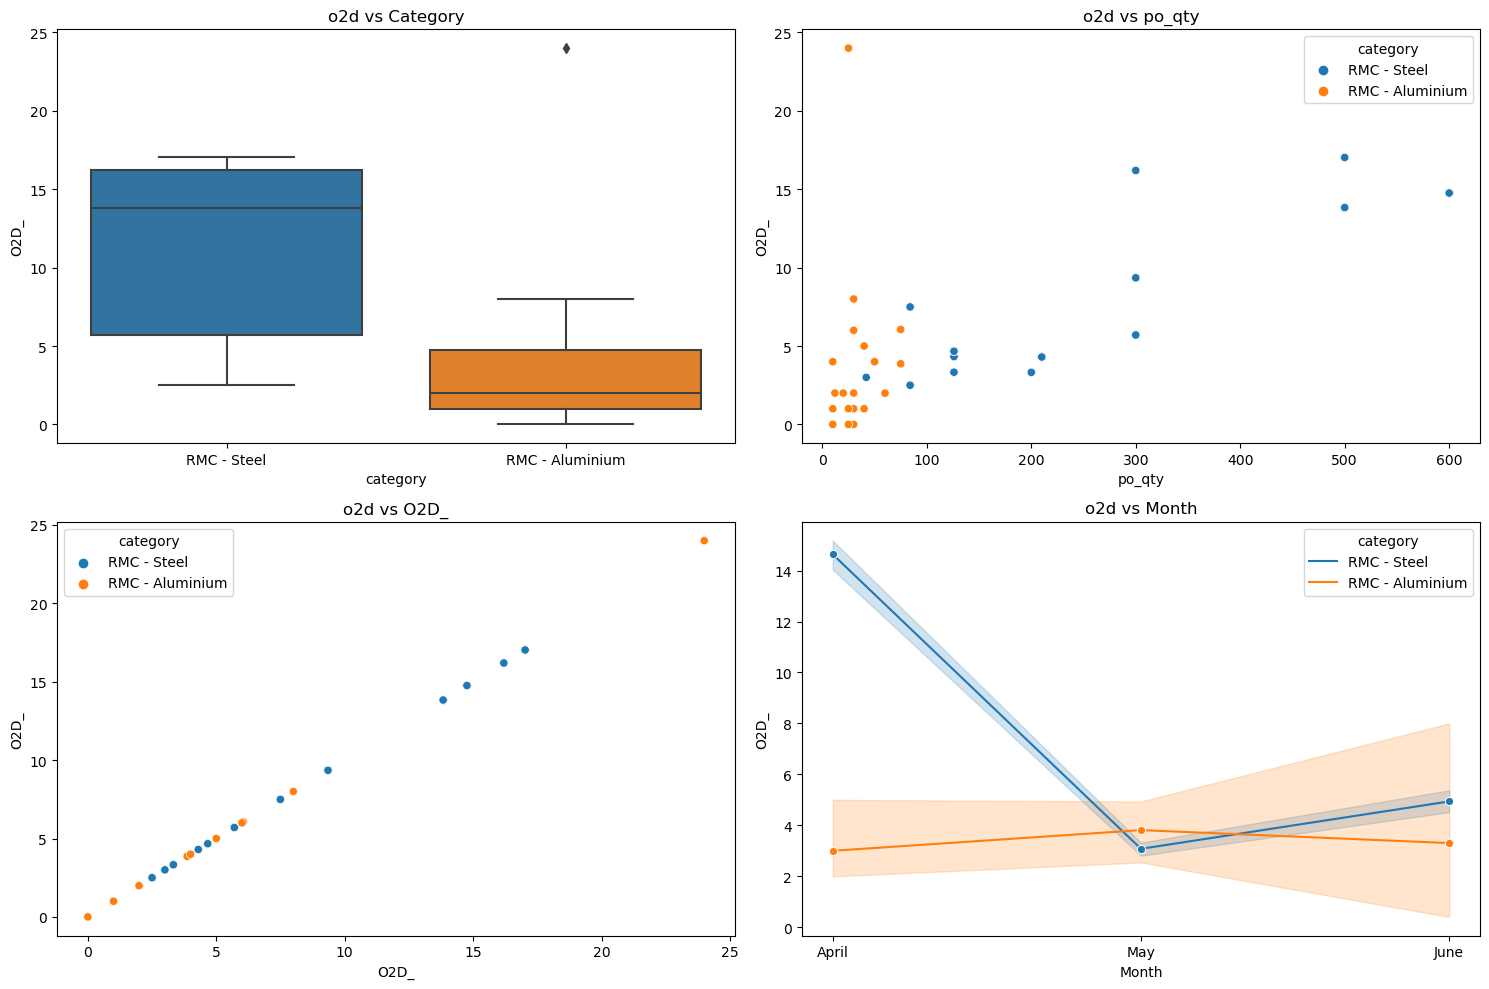

In [458]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: o2d vs category
sns.boxplot(x='category', y='O2D_', data=df, ax=axes[0, 0])
axes[0, 0].set_title('o2d vs Category')

# Plot 2: o2d vs po_qty
sns.scatterplot(x='po_qty', y='O2D_', hue='category', data=df, ax=axes[0, 1])
axes[0, 1].set_title('o2d vs po_qty')

# Plot 3: o2d vs O2D_
sns.scatterplot(x='O2D_', y='O2D_', hue='category', data=df, ax=axes[1, 0])
axes[1, 0].set_title('o2d vs O2D_')

# Plot 4: o2d vs month
sns.lineplot(x='Month', y='O2D_', hue='category', data=df, ax=axes[1, 1], marker='o')
axes[1, 1].set_title('o2d vs Month')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ConversionError: Failed to convert value(s) to axis units: 0      2024-04-24 07:31:00
1      2024-04-22 11:00:00
2      2024-04-29 09:03:00
3      2024-04-28 22:12:00
4      2024-04-26 15:00:00
              ...         
129    2024-05-03 13:58:00
130    2024-05-03 13:58:00
131    2024-04-18 11:04:00
132    2024-04-13 11:52:00
133    2024-04-15 11:55:00
Name: x, Length: 132, dtype: object

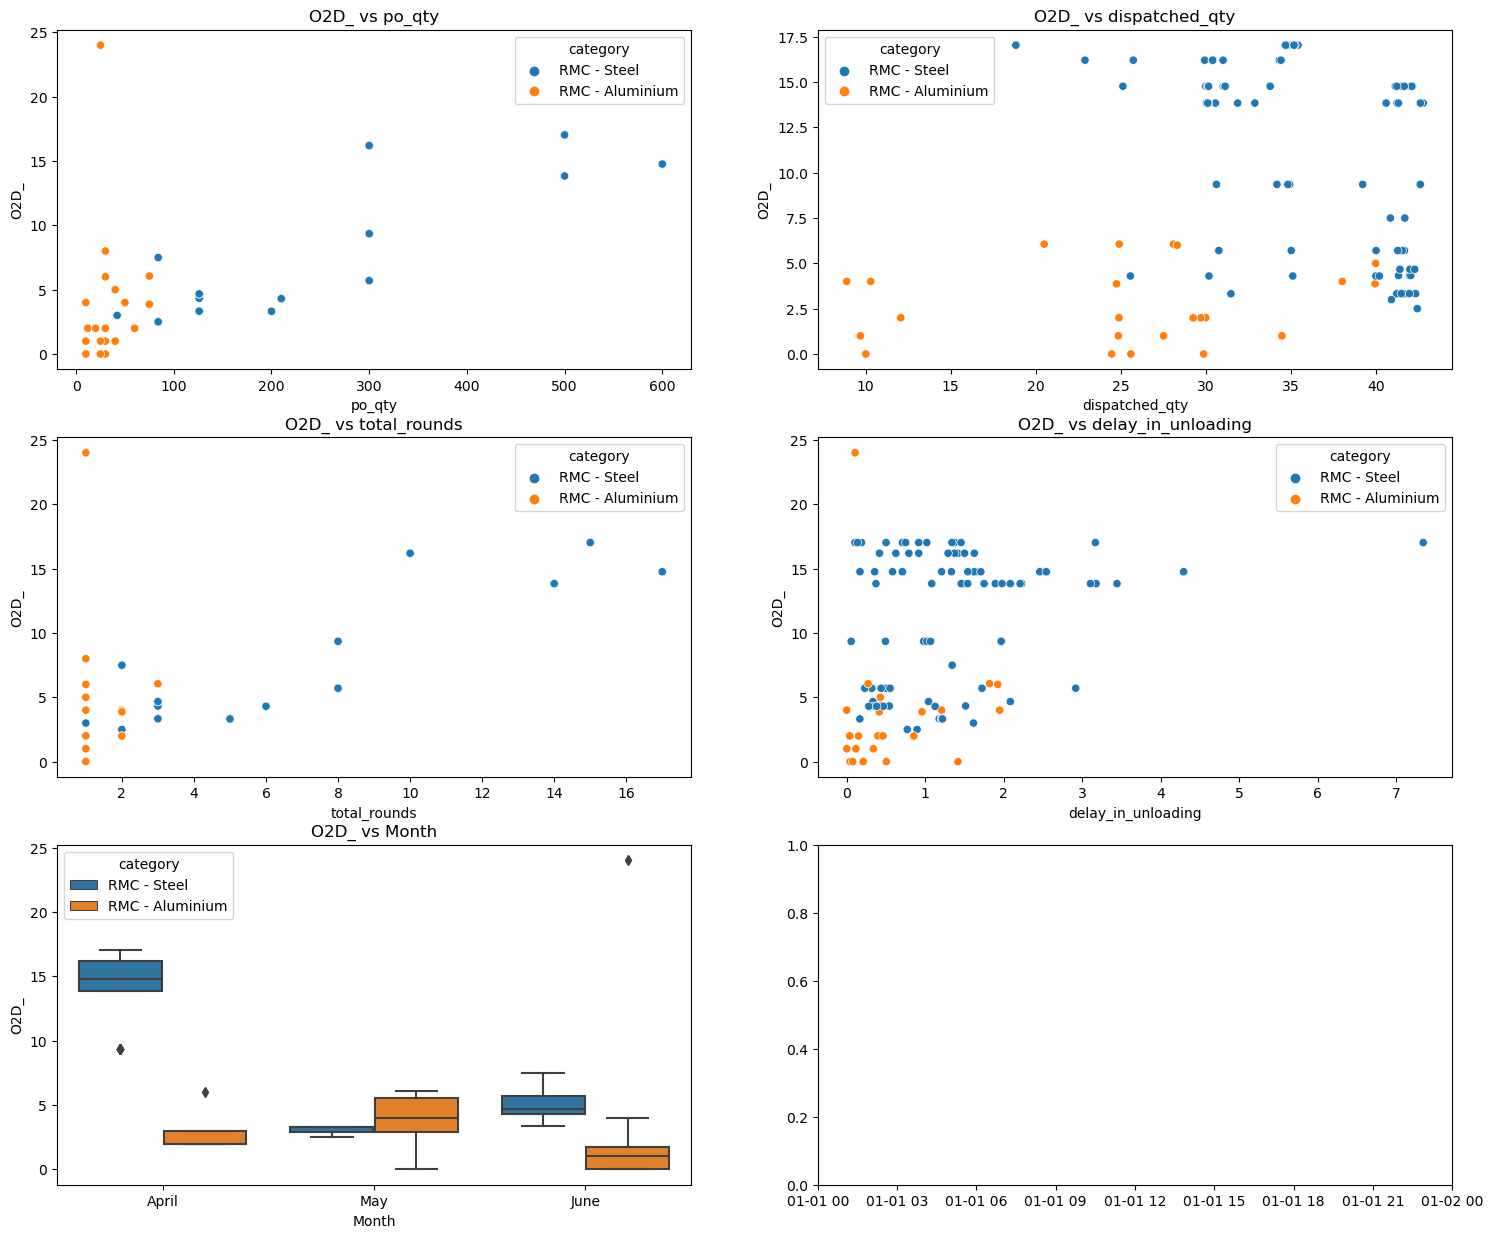

In [459]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Plot 1: O2D_ vs po_qty
sns.scatterplot(x='po_qty', y='O2D_', hue='category', data=df, ax=axes[0, 0])
axes[0, 0].set_title('O2D_ vs po_qty')

# Plot 2: O2D_ vs dispatched_qty
sns.scatterplot(x='dispatched_qty', y='O2D_', hue='category', data=df, ax=axes[0, 1])
axes[0, 1].set_title('O2D_ vs dispatched_qty')

# Plot 3: O2D_ vs total_rounds
sns.scatterplot(x='total_rounds', y='O2D_', hue='category', data=df, ax=axes[1, 0])
axes[1, 0].set_title('O2D_ vs total_rounds')

# Plot 4: O2D_ vs delay_in_unloading
sns.scatterplot(x='delay_in_unloading', y='O2D_', hue='category', data=df, ax=axes[1, 1])
axes[1, 1].set_title('O2D_ vs delay_in_unloading')

# Plot 5: O2D_ vs Month
sns.boxplot(x='Month', y='O2D_', hue='category', data=df, ax=axes[2, 0])
axes[2, 0].set_title('O2D_ vs Month')

# Plot 6: O2D_ vs vehicle_placement_ts (trend over time)
sns.lineplot(x='vehicle_placement_ts', y='O2D_', hue='category', data=df, ax=axes[2, 1], marker='o')
axes[2, 1].set_title('O2D_ Trend over Time')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(18, 20))

# Plot 1: O2D_ vs po_qty
sns.scatterplot(x='po_qty', y='O2D_', hue='category', data=df, ax=axes[0, 0])
axes[0, 0].set_title('O2D_ vs po_qty')

# Plot 2: O2D_ vs dispatched_qty
sns.scatterplot(x='dispatched_qty', y='O2D_', hue='category', data=df, ax=axes[0, 1])
axes[0, 1].set_title('O2D_ vs dispatched_qty')

# Plot 3: O2D_ vs total_rounds
sns.scatterplot(x='total_rounds', y='O2D_', hue='category', data=df, ax=axes[1, 0])
axes[1, 0].set_title('O2D_ vs total_rounds')

# Plot 4: O2D_ vs delay_in_unloading
sns.scatterplot(x='delay_in_unloading', y='O2D_', hue='category', data=df, ax=axes[1, 1])
axes[1, 1].set_title('O2D_ vs delay_in_unloading')

# Plot 5: O2D_ vs Month
sns.boxplot(x='Month', y='O2D_', hue='category', data=df, ax=axes[2, 0])
axes[2, 0].set_title('O2D_ vs Month')

# Plot 6: O2D_ vs vehicle_placement_ts (trend over time)
sns.lineplot(x='vehicle_placement_ts', y='O2D_', hue='category', data=df, ax=axes[2, 1], marker='o')
axes[2, 1].set_title('O2D_ Trend over Time')

# Plot 7: O2D_ vs route
sns.boxplot(x='route', y='O2D_', hue='category', data=df, ax=axes[3, 0])
axes[3, 0].set_title('O2D_ vs Route')
axes[3, 0].tick_params(axis='x', rotation=90)

# Plot 8: O2D_ vs Tons_Bucket
# sns.boxplot(x='Tons_Bucket', y='O2D_', hue='category', data=df, ax=axes[3, 1])
# axes[3, 1].set_title('O2D_ vs Tons_Bucket')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
plt.figure(figsize = (15, 5))
sns.boxplot(df)
plt.xticks(rotation = 45);

In [ ]:
df.pivot_table(index = ['buyer_name', 'category'], columns = ['Month'], aggfunc = {'O2D_':'mean',  'dispatched_qty':'mean', 'total_rounds':'mean'})



In [ ]:
PO QTY = 50

case 1 : 
Vehicle Available is of 18 Ton capacity
Dispatch : 3 vehicles

CAse 2 : 
Vehicle capacity : 30 Ton
Dispatch 2 vehicles

## Conclusions : 

"""
1. Unloading delay seems to be more in case of steel. It can be because steel takes more time to unload, QC, or is more costly.
2. The TAT from vehicle reaching the destination to payment is higher, causing the total delay .
3. Few buyer side storage limitation or cash crunch also seem to occur. For 'po_number' == 'PO/25/MH/88'. 
After dispatched qty hitting the 170-200, the next dispatches seem to slow down.
"""

In [460]:
df[df['seller_name'] == 'ASAN STEELS PRIVATE LIMITED']['po_qty'].mean()

430.4347826086956

In [477]:
df3[df3['po_number'] == 'PO/25/MH/88'][['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin',
       'destination', 'O2D_', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'buyer_name', 'seller_name', 'order', 'Month', 'total_rounds',
       'vehicle_placement_ts','#vehicle_before_unloading',	'qty_before_unloading',	'qty_reached_till_now']]



,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now
116,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.860001,Raipur,Jalna,17.026,2024-04-25 15:30:00,2024-04-26 14:00:00,2024-04-26 18:00:00,2024-04-26 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,1.0,April,15,2024-04-24 10:44:00,5,142.620003,34.860001
117,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.870001,Raipur,Jalna,17.026,2024-04-25 19:20:00,2024-04-26 19:00:00,2024-04-26 19:30:00,2024-04-27 12:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,2.0,April,15,2024-04-24 15:32:00,5,159.020002,53.730001
118,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.830000,Raipur,Jalna,17.026,2024-04-25 19:00:00,2024-04-26 19:00:00,2024-04-26 19:00:00,2024-04-27 13:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,3.0,April,15,2024-04-24 15:32:00,4,140.190002,72.560001
119,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.270000,Raipur,Jalna,17.026,2024-04-26 18:00:00,2024-04-27 12:00:00,2024-04-27 15:30:00,2024-04-27 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,4.0,April,15,2024-04-26 10:24:00,3,104.920002,107.830002
120,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.430000,Raipur,Jalna,17.026,2024-04-26 15:30:00,2024-04-27 12:00:00,NaT,2024-04-30 16:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,5.0,April,15,2024-04-26 10:24:00,5,174.160000,143.260002
121,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.660000,Raipur,Jalna,17.026,2024-04-26 15:30:24,2024-04-29 08:30:00,2024-04-29 12:00:00,2024-04-29 20:31:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,6.0,April,15,2024-04-25 12:35:00,4,139.500000,177.920002
122,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.830002,Raipur,Jalna,17.026,2024-04-25 17:00:00,2024-04-29 08:50:00,2024-04-29 11:00:00,2024-04-30 17:50:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,7.0,April,15,2024-04-24 15:26:00,3,104.669998,212.750004
123,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.889999,Raipur,Jalna,17.026,2024-04-27 18:00:00,2024-04-29 10:00:00,2024-04-29 12:18:00,2024-04-29 13:18:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,8.0,April,15,2024-04-27 10:12:00,0,0.000000,247.640003
124,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.869999,Raipur,Jalna,17.026,2024-04-29 20:30:00,2024-05-03 22:03:00,NaT,2024-05-05 09:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,9.0,April,15,2024-04-29 11:50:00,6,209.639999,282.510002
125,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.910000,Raipur,Jalna,17.026,2024-04-29 19:30:00,2024-05-05 09:25:00,2024-05-02 17:10:00,2024-05-12 17:40:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,10.0,April,15,2024-04-27 10:12:00,5,174.730000,317.420002


In [464]:
df[df['buyer_name'] == 'METAROLLS ISPAT PRIVATE LIMITED']['seller_name'].unique()

array(['SUNIL SPONGE PRIVATE LIMITED', 'ASAN STEELS PRIVATE LIMITED'],
      dtype=object)

In [468]:
df3[(df3['buyer_name'] == 'METAROLLS ISPAT PRIVATE LIMITED') & (df['seller_name'] == 'SUNIL SPONGE PRIVATE LIMITED' )]

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,delay_in_unloading,reached_to_payment_tat,payment_to_unloading_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_champa-ahmndabad,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-hyderabad,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now,vehicle_wise_o2d
93,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,25.570000,Raipur,Jalna,4.299592,2024-06-21 20:25:00,2024-06-24 09:00:00,NaT,2024-06-24 20:10:00,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,1.0,June,6,2024-06-20 11:38:00,0.465278,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,3,115.339996,25.570000,0
94,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,35.119999,Raipur,Jalna,4.299592,2024-06-22 14:00:00,2024-06-24 11:00:00,NaT,2024-06-24 19:30:00,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,2.0,June,6,2024-06-20 11:38:00,0.354167,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,2,80.219997,60.689999,0
95,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,40.009998,Raipur,Jalna,4.299592,2024-06-21 20:25:00,2024-06-24 14:00:00,NaT,2024-06-24 20:45:00,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,3.0,June,6,2024-06-20 11:38:00,0.281250,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,1,40.209999,100.699997,0
96,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,40.209999,Raipur,Jalna,4.299592,2024-06-22 15:00:00,2024-06-24 14:00:00,NaT,2024-06-25 17:00:00,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,4.0,June,6,2024-06-20 11:38:00,1.125000,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,1,30.190001,140.909996,0
97,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,30.190001,Raipur,Jalna,4.299592,2024-06-24 21:45:00,2024-06-27 07:55:00,NaT,2024-06-27 17:04:00,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,5.0,June,6,2024-06-24 11:24:00,0.381250,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,0,0.000000,171.099997,0
98,PO/25/MH/572,210,2024-06-19 17:45:00,RMC - Steel,NaN,NaN,NaN,4.299592,2024-07-01 19:00:00,2024-07-03 07:52:00,NaT,NaT,METAROLLS ISPAT PRIVATE LIMITED,SUNIL SPONGE PRIVATE LIMITED,6.0,June,6,2024-06-29 11:13:00,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0.000000,NaN,0


In [472]:
df[df['seller_name'] == 'ASAN STEELS PRIVATE LIMITED'].groupby(['po_number', 'buyer_name'])['po_qty'].max()

po_number    buyer_name                     
PO/25/MH/73  METAROLLS ISPAT PRIVATE LIMITED    300
PO/25/MH/88  METAROLLS ISPAT PRIVATE LIMITED    500
Name: po_qty, dtype: int64

In [473]:
df3[df3['po_number'] == 'PO/25/MH/73'][['po_number', 'po_qty', 'po_ts', 'category', 'dispatched_qty', 'origin',
       'destination', 'O2D_', 'vehicle_dispatched_ts',
       'vehicle_reached_delivery_location_ts',
       'payment_confirmation_received_by_ops', 'vehicle_unloaded_ts',
       'buyer_name', 'seller_name', 'order', 'Month', 'total_rounds',
       'vehicle_placement_ts','#vehicle_before_unloading',	'qty_before_unloading',	'qty_reached_till_now']]



,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now
108,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,39.230000,Raipur,Jalna,9.35014,2024-04-15 15:32:00,2024-04-18 09:00:00,2024-04-18 10:12:00,2024-04-19 10:45:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,1.0,April,8,2024-04-13 18:22:00,3,119.419998,39.230000
109,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,34.189999,Raipur,Jalna,9.35014,2024-04-15 17:20:00,2024-04-18 12:00:00,2024-04-18 12:00:00,2024-04-19 11:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,2.0,April,8,2024-04-13 18:22:00,2,85.230000,73.419998
110,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,42.610001,Raipur,Jalna,9.35014,2024-04-16 21:30:00,2024-04-19 20:30:00,2024-04-20 12:23:00,2024-04-21 19:43:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,3.0,April,8,2024-04-14 20:30:00,1,42.619999,116.029999
111,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,42.619999,Raipur,Jalna,9.35014,2024-04-17 14:30:00,2024-04-19 20:30:00,2024-04-20 12:23:00,2024-04-21 19:43:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,4.0,April,8,2024-04-14 20:30:00,0,0.000000,158.649998
112,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,34.830002,Raipur,Jalna,9.35014,2024-04-22 16:05:00,2024-04-25 06:01:00,2024-04-25 11:58:00,2024-04-25 17:51:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,5.0,April,8,2024-04-22 09:54:00,3,100.400000,193.480000
113,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,34.939999,Raipur,Jalna,9.35014,2024-04-23 20:43:44,2024-04-25 16:30:00,2024-04-25 17:30:00,2024-04-26 17:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,6.0,April,8,2024-04-21 10:05:24,2,65.460001,228.419998
114,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,34.830002,Raipur,Jalna,9.35014,2024-04-25 03:10:00,2024-04-26 17:50:00,2024-04-27 15:07:24,2024-04-27 19:27:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,7.0,April,8,2024-04-23 06:01:00,1,30.629999,263.250000
115,PO/25/MH/73,300,2024-04-10 18:53:40,RMC - Steel,30.629999,Raipur,Jalna,9.35014,2024-04-23 20:43:44,2024-04-27 16:30:00,2024-04-27 17:00:00,2024-04-27 17:51:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,8.0,April,8,2024-04-21 10:05:24,0,0.000000,293.879999


In [489]:
df.groupby('buyer_name')['po_number'].unique()

buyer_name
ADITYA METAL INDUSTRIES                                              [PO/25/MH/426, PO/25/MH/96]
ANVIL CABLES PRIVATE LIMITED                                        [PO/25/MH/271, PO/25/MH/539]
AVS INFRA PROJECT                                                   [PO/25/HA/341, PO/25/HA/577]
Amar Partap Steels Pvt. Ltd.                                        [PO/25/HA/436, PO/25/HA/598]
DEVA METAL POWDERS PRIVATE LIMITED                                                [PO/25/MH/124]
HANNU STEEL PRIVATE LIMITED                           [PO/25/HA/111, PO/25/HA/128, PO/25/HA/635]
KPS ALUMINIUM AND GLASS PRIVATE LIMITED                                           [PO/25/MH/601]
M/S SHREE GANPATI TRADERS                                                         [PO/25/HA/130]
MAHA SAI ALUMINIUM PROFILES PRIVATE LIMITED                                       [PO/25/MH/498]
METAROLLS ISPAT PRIVATE LIMITED                         [PO/25/MH/572, PO/25/MH/73, PO/25/MH/88]
R.C.ALUMINIUM      

In [499]:
df3[df3['po_number'] == 'PO/25/MH/88']

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,delay_in_unloading,reached_to_payment_tat,payment_to_unloading_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_champa-ahmndabad,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-hyderabad,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now,vehicle_wise_o2d
116,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.860001,Raipur,Jalna,17.026,2024-04-25 15:30:00,2024-04-26 14:00:00,2024-04-26 18:00:00,2024-04-26 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,1.0,April,15,2024-04-24 10:44:00,0.104167,0.166667,-0.062500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,5,142.620003,34.860001,0
117,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.870001,Raipur,Jalna,17.026,2024-04-25 19:20:00,2024-04-26 19:00:00,2024-04-26 19:30:00,2024-04-27 12:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,2.0,April,15,2024-04-24 15:32:00,0.708333,0.020833,0.687500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,5,159.020002,53.730001,0
118,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,18.830000,Raipur,Jalna,17.026,2024-04-25 19:00:00,2024-04-26 19:00:00,2024-04-26 19:00:00,2024-04-27 13:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,3.0,April,15,2024-04-24 15:32:00,0.750000,0.000000,0.750000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,4,140.190002,72.560001,0
119,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.270000,Raipur,Jalna,17.026,2024-04-26 18:00:00,2024-04-27 12:00:00,2024-04-27 15:30:00,2024-04-27 16:30:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,4.0,April,15,2024-04-26 10:24:00,0.187500,0.145833,0.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,3,104.920002,107.830002,0
120,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,35.430000,Raipur,Jalna,17.026,2024-04-26 15:30:00,2024-04-27 12:00:00,NaT,2024-04-30 16:00:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,5.0,April,15,2024-04-26 10:24:00,3.166667,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,5,174.160000,143.260002,0
121,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.660000,Raipur,Jalna,17.026,2024-04-26 15:30:24,2024-04-29 08:30:00,2024-04-29 12:00:00,2024-04-29 20:31:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,6.0,April,15,2024-04-25 12:35:00,0.500694,0.145833,0.354861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,4,139.500000,177.920002,0
122,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.830002,Raipur,Jalna,17.026,2024-04-25 17:00:00,2024-04-29 08:50:00,2024-04-29 11:00:00,2024-04-30 17:50:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,7.0,April,15,2024-04-24 15:26:00,1.375000,0.090278,1.284722,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,3,104.669998,212.750004,0
123,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34.889999,Raipur,Jalna,17.026,2024-04-27 18:00:00,2024-04-29 10:00:00,2024-04-29 12:18:00,2024-04-29 13:18:00,METAROLLS ISPAT PRIVATE LIMITED,ASAN STEELS PRIVATE LIMITED,8.0,April,15,2024-04-27 10:12:00,0.137500,0.095833,0.041667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,raipur-jalna,0,0.000000,247.640003,0
124,PO/25/MH/88,500,2024-04-12 16:04:40,RMC - Steel,34

In [491]:
df3[df3['po_number'] == 'PO/25/HA/111']

,po_number,po_qty,po_ts,category,dispatched_qty,origin,destination,O2D_,vehicle_dispatched_ts,vehicle_reached_delivery_location_ts,payment_confirmation_received_by_ops,vehicle_unloaded_ts,buyer_name,seller_name,order,Month,total_rounds,vehicle_placement_ts,delay_in_unloading,reached_to_payment_tat,payment_to_unloading_tat,route_bardhaman-jaipur,route_bardhman-jaipur,route_champa-ahmndabad,route_champa-bhyla,route_durgapur-beawer,route_durgapur-jaipur,route_durgapur-pali,route_durgapur-sikendarabad,route_hyderabad-hyderabad,route_jaipur-ghaziabad,route_kolkata-jharkhand,route_korba-bhubneshawar,route_korba-halda,route_korba-haldia,route_raipur-gandhinagar,route_raipur-hadapsar,route_raipur-hyderabad,route_raipur-jalna,route_raipur-kheda,route_raipur-medak,route_raipur-mehsana,route_raipur-raipur,route_raipur-varanasi,route_ramgarh-jaipur,route_visakhapatnam-kheda,route_visakhapatnam-medak,route,#vehicle_before_unloading,qty_before_unloading,qty_reached_till_now,vehicle_wise_o2d
0,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,30.000000,Durgapur,Sikendarabad,14.759483,2024-04-24 22:00:00,2024-04-26 11:00:00,2024-04-27 14:14:00,2024-04-27 16:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,1.0,April,17,2024-04-24 07:31:00,1.208333,1.134722,0.073611,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,1,25.129999,30.000000,0
1,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,25.129999,Durgapur,Sikendarabad,14.759483,2024-04-24 22:15:00,2024-04-26 23:00:00,2024-04-27 16:15:00,2024-04-28 15:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,2.0,April,17,2024-04-22 11:00:00,1.666667,0.718750,0.947917,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,1,33.790001,55.129999,0
2,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,42.040001,Durgapur,Sikendarabad,14.759483,2024-04-29 21:00:00,2024-05-02 09:00:00,2024-05-02 11:00:00,2024-05-02 13:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,3.0,April,17,2024-04-29 09:03:00,0.166667,0.083333,0.083333,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,5,188.730003,97.170000,0
3,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,41.520000,Durgapur,Sikendarabad,14.759483,2024-04-29 22:00:00,2024-05-02 09:28:00,2024-05-02 13:01:00,2024-05-02 13:30:24,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,4.0,April,17,2024-04-28 22:12:00,0.168333,0.147917,0.020417,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,4,147.210003,138.690001,0
4,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,33.790001,Durgapur,Sikendarabad,14.759483,2024-04-27 22:00:00,2024-05-02 09:28:00,2024-05-02 01:46:00,2024-05-02 18:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,5.0,April,17,2024-04-26 15:00:00,0.355556,-0.320833,0.676389,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,4,144.580002,172.480001,0
5,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,42.160000,Durgapur,Sikendarabad,14.759483,2024-05-01 22:00:00,2024-05-04 03:00:00,NaT,2024-05-04 20:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,6.0,April,17,2024-04-30 07:10:00,0.708333,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,11,381.070004,214.640001,0
6,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,30.110001,Durgapur,Sikendarabad,14.759483,2024-05-01 22:00:00,2024-05-04 18:30:00,2024-05-06 18:47:00,2024-05-07 07:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,7.0,April,17,2024-04-30 13:59:00,2.520833,2.011806,0.509028,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,10,350.960003,244.750002,0
7,PO/25/HA/111,600,2024-04-16 17:54:35,RMC - Steel,42.119999,Durgapur,Sikendarabad,14.759483,2024-05-02 22:00:00,2024-05-05 02:00:00,NaT,2024-05-05 16:00:00,HANNU STEEL PRIVATE LIMITED,SUMANGAL ISPAT PVT LTD,8.0,April,17,2024-05-01 12:31:00,0.583333,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,durgapur-sikendarabad,9,308.840004,286